In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import anndata as ad
from PIL import Image
from sklearn.cluster import KMeans
import scanpy as sc
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from colorsys import rgb_to_hsv
from itertools import combinations
from matplotlib.cm import get_cmap

# Load the AnnData

In [2]:
parent_folder = os.getcwd()
subfolder_name = "adata_baroque_paintings"
file_name = "adata_baroque_paintings_trial6_complementarity.h5ad"

save_path = os.path.join(parent_folder, subfolder_name, file_name)
adata_baroque_paintings = sc.read_h5ad(save_path)

In [3]:
adata_baroque_paintings

AnnData object with n_obs × n_vars = 286 × 120
    obs: 'Painting_name', 'Width', 'Height', 'Commission_Year', 'Completion_Year', 'Painter', 'sacred', 'Jesuit_Art', 'Baroque_Art', 'Laplacian_Contrast', 'Gradient_Contrast', 'Hybrid_Contrast', 'File Name', 'color_prop_1', 'color_prop_2', 'color_prop_3', 'color_prop_4', 'color_prop_5', 'color_prop_6', 'color_prop_7', 'color_prop_8', 'color_prop_9', 'color_prop_10', 'color_prop_11', 'color_prop_12', 'color_prop_13', 'color_prop_14', 'color_prop_15', 'color_prop_16', 'color_prop_17', 'color_prop_18', 'color_prop_19', 'color_prop_20', 'not_sacred', 'not_Baroque_Art', 'not_Jesuit_Art', 'color_complementarity_score'

# Color Wheel - All Paintings

In [4]:
def plot_painting_colors(adata, painting_idx, base_folder, n_colors=20):
    # Metadata
    painting_obs = adata.obs.iloc[painting_idx]
    painting_name = painting_obs['Painting_name']
    complementarity_score = painting_obs['color_complementarity_score']
    file_name = painting_obs['File Name']

    # Image
    image_path = os.path.join(base_folder, "Baroque_paintings_repository", file_name)
    img = Image.open(image_path)

    # Raw Data from the images
    first_row_df = adata[painting_idx, :].to_df()

    # 20 main colors
    rgb_colors = np.array([
        [
            first_row_df[f"color_{i}_R"].values[0],
            first_row_df[f"color_{i}_G"].values[0],
            first_row_df[f"color_{i}_B"].values[0]
        ]
        for i in range(1, n_colors + 1)
    ]) / 255.0

    # Hue converted to theta and saturation to the radius for polar coordinates
    theta = np.array([
        first_row_df[f"color_{i}_H"].values[0] * 2*np.pi
        for i in range(1, n_colors + 1)
    ])
    r = np.array([
        first_row_df[f"color_{i}_S"].values[0]
        for i in range(1, n_colors + 1)
    ])

    # Polar Coordinate Graph
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                                   gridspec_kw={'width_ratios':[1,1]})

    ax1 = plt.subplot(1, 2, 1, polar=True)

    ax1.scatter(theta, r, s=50, color=rgb_colors, edgecolors='k', alpha=0.7)

    ax1.scatter(theta[0], r[0], s=150, color=rgb_colors[0],
                edgecolors='gold', linewidths=2, zorder=5)

    ax1.set_ylim(0, 1)
    ax1.set_yticks([0.25, 0.5, 0.75, 1])
    ax1.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
    ax1.set_title(f"{painting_name}\nComplementarity Score: {complementarity_score:.2f}",
                  va='bottom')

    # Showing the image
    ax2.imshow(img)
    ax2.axis('off')
    ax2.set_title("Painting Image")

    plt.tight_layout()
    plt.show()

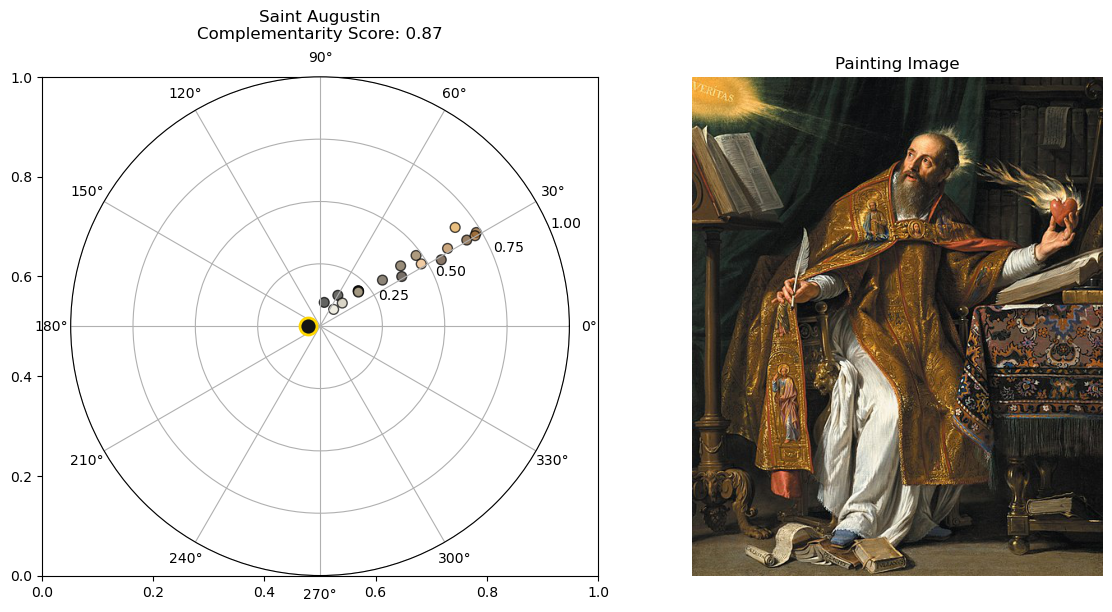

In [5]:
plot_painting_colors(
    adata=adata_baroque_paintings,
    painting_idx=201,
    base_folder=os.getcwd()
)

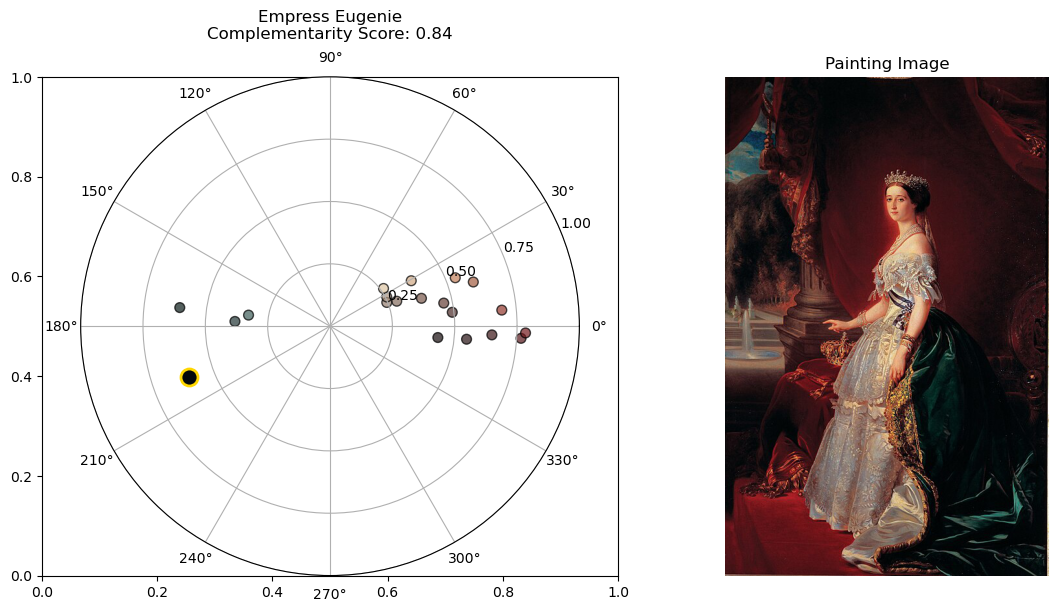

In [6]:
plot_painting_colors(
    adata=adata_baroque_paintings,
    painting_idx=212,
    base_folder=os.getcwd()
)

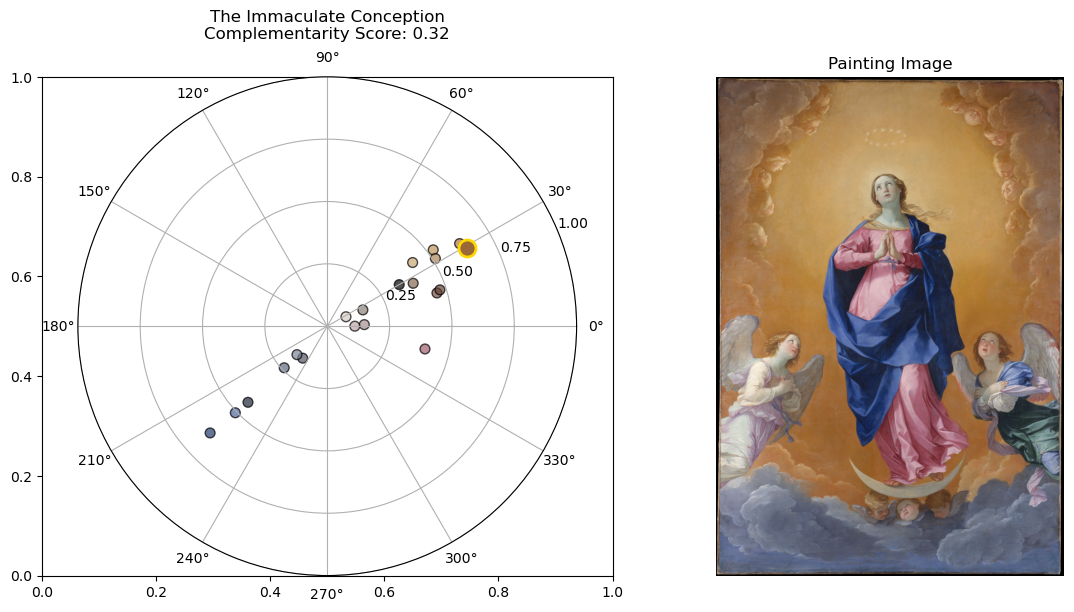

In [7]:
plot_painting_colors(
    adata=adata_baroque_paintings,
    painting_idx=36,
    base_folder=os.getcwd()
)

In [8]:
def plot_painting_colors_circular(adata, painting_idx, n_colors=20):
   # Metadata
    painting_obs = adata.obs.iloc[painting_idx]
    painting_name = painting_obs['Painting_name']
    complementarity_score = painting_obs['color_complementarity_score']

    # Extracting RAw Data
    first_row_df = adata[painting_idx, :].to_df()

    # Getting the 20 main colors
    rgb_colors = np.array([
        [
            first_row_df[f"color_{i}_R"].values[0],
            first_row_df[f"color_{i}_G"].values[0],
            first_row_df[f"color_{i}_B"].values[0]
        ]
        for i in range(1, n_colors + 1)
    ]) / 255.0

    # Hue converted to theta and satuartion to radius for polar coordinate graph
    theta = np.array([
        first_row_df[f"color_{i}_H"].values[0] * 2*np.pi
        for i in range(1, n_colors + 1)
    ])
    r = np.array([
        first_row_df[f"color_{i}_S"].values[0]
        for i in range(1, n_colors + 1)
    ])

    #  Creating the polar coordinate graph
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

    ax.scatter(theta, r, s=50, color=rgb_colors, edgecolors='k', alpha=0.7)

    ax.scatter(theta[0], r[0], s=150, color=rgb_colors[0],
               edgecolors='gold', linewidths=2, zorder=5)

    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.5, 0.75, 1])
    ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
    ax.set_title(f"{painting_name}\nComplementarity Score: {complementarity_score:.2f}",
                 va='bottom')

    plt.tight_layout()
    plt.show()

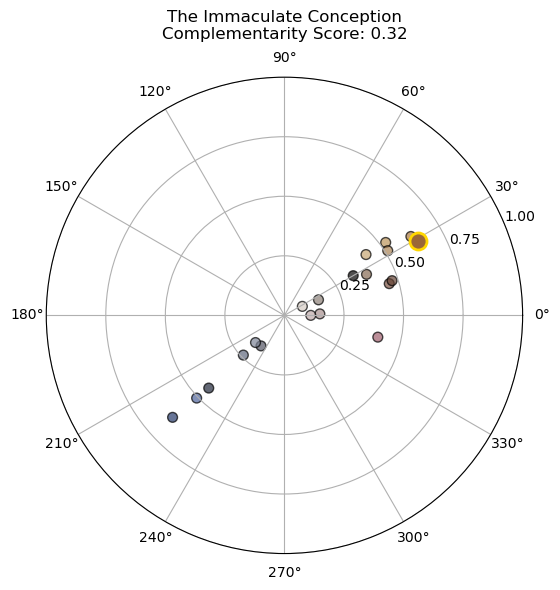

In [9]:
plot_painting_colors_circular(adata = adata_baroque_paintings, painting_idx =36 , n_colors=20)

# Plotting Baroque vs Non Baroque

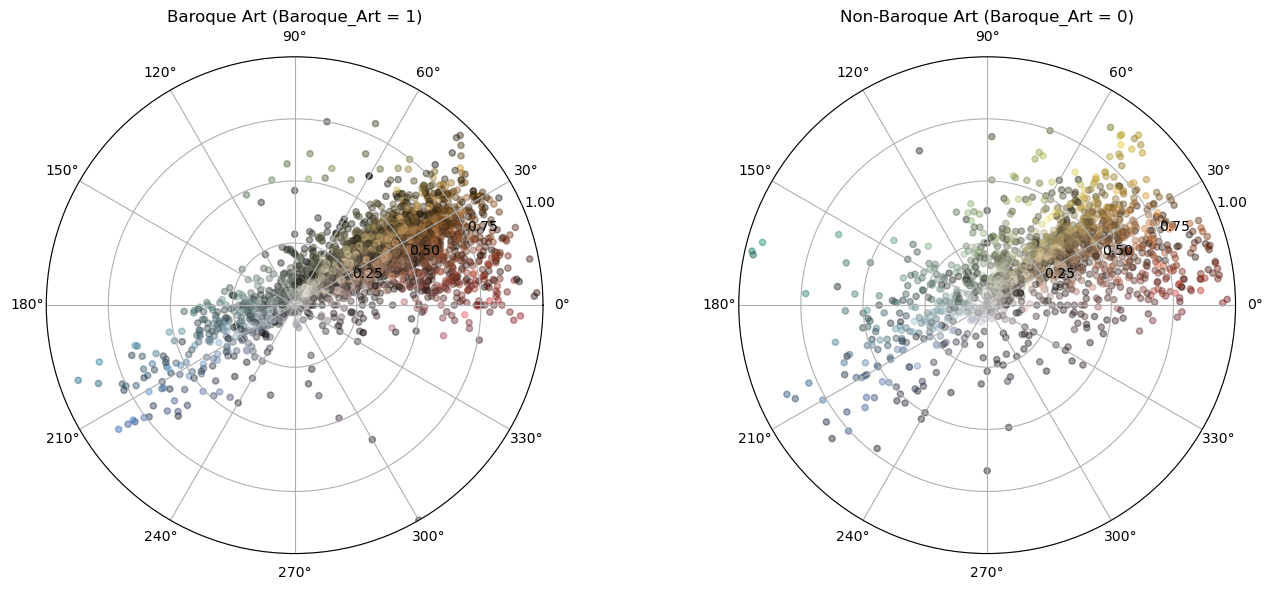

In [10]:
# Number of colors per painting
n_colors = 20

# Split indices based on Baroque_Art = 1 or 0
idx_baroque = np.where(adata_baroque_paintings.obs["Baroque_Art"] == 1)[0]
idx_nonbaroque = np.where(adata_baroque_paintings.obs["Baroque_Art"] == 0)[0]

# Create figure with two polar subplots
fig, axes = plt.subplots(
    1, 2,
    figsize=(14, 6),
    subplot_kw={'projection': 'polar'}
)

titles = ["Baroque Art (Baroque_Art = 1)", "Non-Baroque Art (Baroque_Art = 0)"]
groups = [idx_baroque, idx_nonbaroque]

for ax, title, group_indices in zip(axes, titles, groups):

    # Looping over each painting in this subset
    for painting_idx in group_indices:

        row_df = adata_baroque_paintings[painting_idx, :].to_df()

        # Extract RGB
        rgb_colors = np.array([
            [
                row_df[f"color_{i}_R"].values[0],
                row_df[f"color_{i}_G"].values[0],
                row_df[f"color_{i}_B"].values[0]
            ]
            for i in range(1, n_colors + 1)
        ]) / 255.0

        
        theta = np.array([
            row_df[f"color_{i}_H"].values[0] * 2 * np.pi
            for i in range(1, n_colors + 1)
        ])
        r = np.array([
            row_df[f"color_{i}_S"].values[0]
            for i in range(1, n_colors + 1)
        ])

        ax.scatter(theta, r, s=20, color=rgb_colors, alpha=0.4)

   
    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.5, 0.75, 1])
    ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Plotting Sacred Baroque versus Non-Sacred Baroque

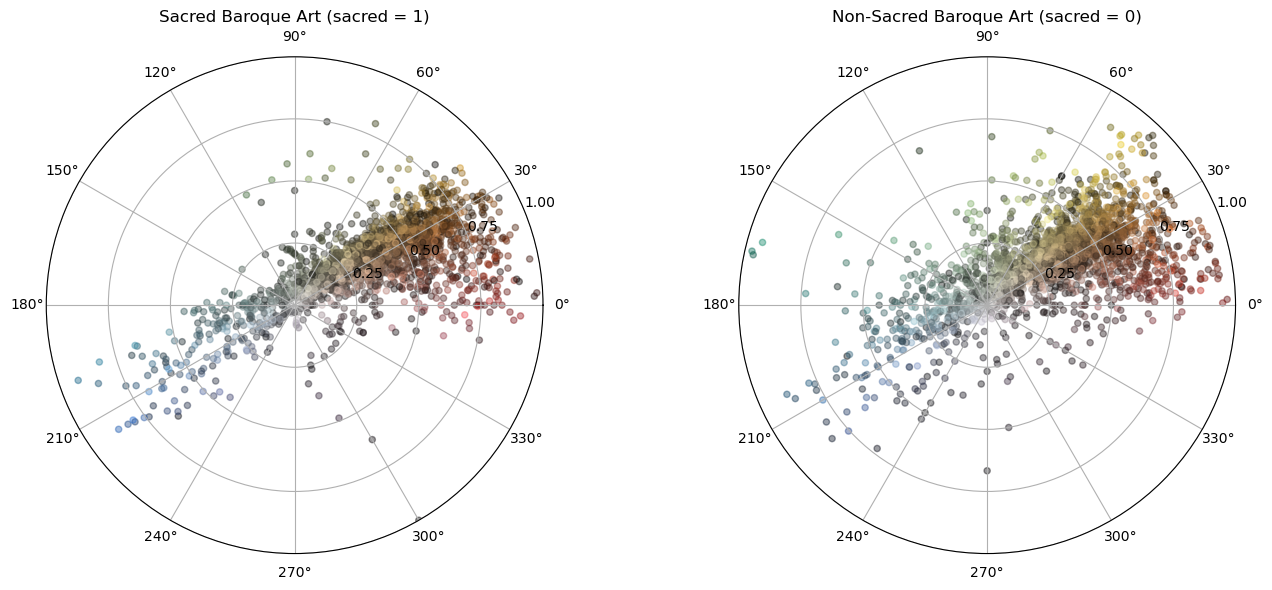

In [11]:
# Number of colors per painting
n_colors = 20

# Split indices based on Baroque_Art = 1 or 0
idx_baroque = np.where(adata_baroque_paintings.obs["sacred"] == 1)[0]
idx_nonbaroque = np.where(adata_baroque_paintings.obs["sacred"] == 0)[0]

# Create figure with two polar subplots
fig, axes = plt.subplots(
    1, 2,
    figsize=(14, 6),
    subplot_kw={'projection': 'polar'}
)

titles = ["Sacred Baroque Art (sacred = 1)", "Non-Sacred Baroque Art (sacred = 0)"]
groups = [idx_baroque, idx_nonbaroque]

for ax, title, group_indices in zip(axes, titles, groups):

    # Looping over each painting
    for painting_idx in group_indices:

        row_df = adata_baroque_paintings[painting_idx, :].to_df()

        # Extract RGB
        rgb_colors = np.array([
            [
                row_df[f"color_{i}_R"].values[0],
                row_df[f"color_{i}_G"].values[0],
                row_df[f"color_{i}_B"].values[0]
            ]
            for i in range(1, n_colors + 1)
        ]) / 255.0

        theta = np.array([
            row_df[f"color_{i}_H"].values[0] * 2 * np.pi
            for i in range(1, n_colors + 1)
        ])
        r = np.array([
            row_df[f"color_{i}_S"].values[0]
            for i in range(1, n_colors + 1)
        ])

        ax.scatter(theta, r, s=20, color=rgb_colors, alpha=0.4)

    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.5, 0.75, 1])
    ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Splitting the Data into Target and Parameters

In [12]:
X = adata_baroque_paintings.obs[["Completion_Year","Laplacian_Contrast", "Gradient_Contrast", "Hybrid_Contrast", "color_complementarity_score"]]
Y_sacred = adata_baroque_paintings.obs["sacred"]
Y_jesuit = adata_baroque_paintings.obs["Jesuit_Art"]

In [13]:
X

Completion_Year  Laplacian_Contrast  Gradient_Contrast  \
Painting_index                                                           
1                          1605            0.010107           0.039573   
2                          1599            0.007477           0.024709   
3                          1600            0.015918           0.039988   
4                          1600            0.009649           0.033868   
5                          1600            0.012177           0.028396   
...                         ...                 ...                ...   
282                        1888            0.050316           0.131409   
283                        1889            0.053616           0.112423   
284                        1888            0.053712           0.127103   
285                        1888            0.033626           0.075656   
286                        1888            0.047180           0.144389   

                Hybrid_Contrast  color_complementarity_score  
Painting_index                                                
1                      0.024840                     0.042089  
2                      0.016093                     0.083127  
3                      0.027953                     0.082595  
4                      0.021758                     0.005416  
5                      0.020287                     0.003148  
...                         ...                          ...  
282                    0.090862                     0.119284  
283                    0.083019                     0.372845  
284                    0.090407                     0.552021  
285                    0.054641                     0.009948  
286                    0.095785                     0.357886  

[286 rows x 5 columns]

In [14]:
# 1. Combine X and Y_sacred into one dataframe
data_frame_plotting_sacred = pd.concat([Y_sacred, X], axis=1)

# 2. Melt into long format
data_frame_plotting_long_sacred = data_frame_plotting_sacred.melt(
    id_vars="sacred",                 # Y_sacred
    value_vars=X.columns.tolist(),    # X variables
    var_name="feature",
    value_name="value"
)

data_frame_plotting_long_sacred

sacred                      feature        value
0          1              Completion_Year  1605.000000
1          1              Completion_Year  1599.000000
2          1              Completion_Year  1600.000000
3          1              Completion_Year  1600.000000
4          0              Completion_Year  1600.000000
...      ...                          ...          ...
1425       0  color_complementarity_score     0.119284
1426       0  color_complementarity_score     0.372845
1427       0  color_complementarity_score     0.552021
1428       0  color_complementarity_score     0.009948
1429       0  color_complementarity_score     0.357886

[1430 rows x 3 columns]

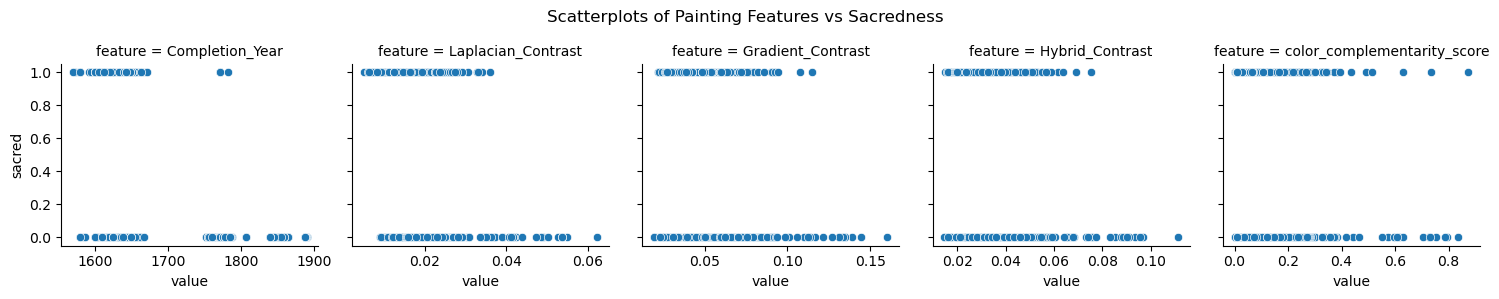

In [15]:
#Creating scatter plots using sns.relplot
sns.relplot(
    data=data_frame_plotting_long_sacred,
    x='value',
    y='sacred',
    col='feature',
    col_wrap=5,
    kind='scatter',
    height=3,
    facet_kws={'sharex': False, 'sharey': True}
)

plt.subplots_adjust(top=0.80)
plt.suptitle('Scatterplots of Painting Features vs Sacredness')
plt.show()

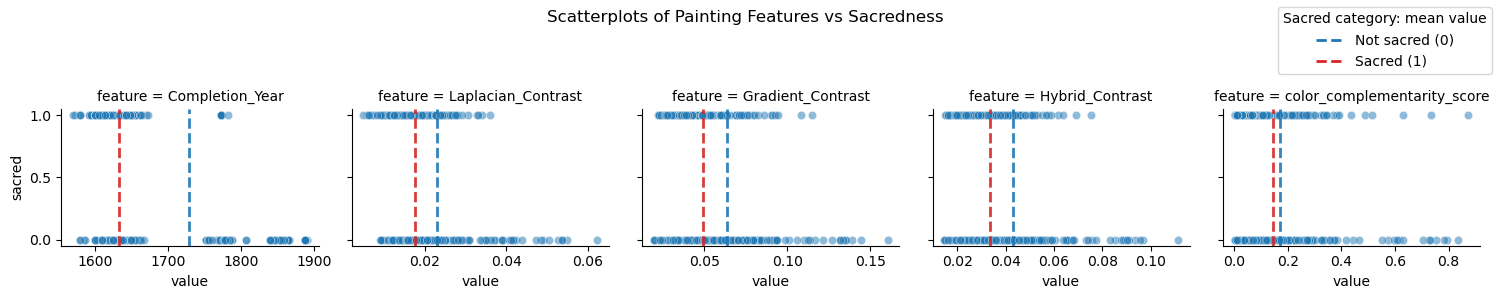

In [24]:
import matplotlib.lines as mlines

g = sns.relplot(
    data=data_frame_plotting_long_sacred,
    x='value',
    y='sacred',
    col='feature',
    col_wrap=5,
    kind='scatter',
    height=3,
    facet_kws={'sharex': False, 'sharey': True},
    alpha=0.5
)

palette = {0: 'tab:blue', 1: 'tab:red'}

def add_mean_lines(data, **kwargs):
    ax = plt.gca()
    means = data.groupby('sacred')['value'].mean()

    for sacred, mean_val in means.items():
        ax.axvline(
            mean_val,
            color=palette[sacred],
            linestyle='--',
            linewidth=2,
            alpha=0.9
        )

g.map_dataframe(add_mean_lines)


blue_line = mlines.Line2D(
    [], [], color='tab:blue', linestyle='--', linewidth=2,
    label='Not sacred (0)'
)
red_line = mlines.Line2D(
    [], [], color='tab:red', linestyle='--', linewidth=2,
    label='Sacred (1)'
)

g.fig.legend(
    handles=[blue_line, red_line],
    loc='upper right',
    title='Sacred category: mean value'
)

plt.subplots_adjust(top=0.65)
g.fig.suptitle(
    'Scatterplots of Painting Features vs Sacredness'
)
plt.show()

In [10]:
#Combine X and Y_sacred into one dataframe
data_frame_plotting_jesuit = pd.concat([Y_jesuit, X], axis=1)

#  Melt into long format
data_frame_plotting_long_jesuit = data_frame_plotting_jesuit.melt(
    id_vars="Jesuit_Art",                 # Y_sacred
    value_vars=X.columns.tolist(),    # X variables
    var_name="feature",
    value_name="value"
)

data_frame_plotting_long_jesuit

Jesuit_Art                      feature        value
0              0              Completion_Year  1605.000000
1              0              Completion_Year  1599.000000
2              0              Completion_Year  1600.000000
3              0              Completion_Year  1600.000000
4              0              Completion_Year  1600.000000
...          ...                          ...          ...
1425           0  color_complementarity_score     0.119284
1426           0  color_complementarity_score     0.372845
1427           0  color_complementarity_score     0.552021
1428           0  color_complementarity_score     0.009948
1429           0  color_complementarity_score     0.357886

[1430 rows x 3 columns]

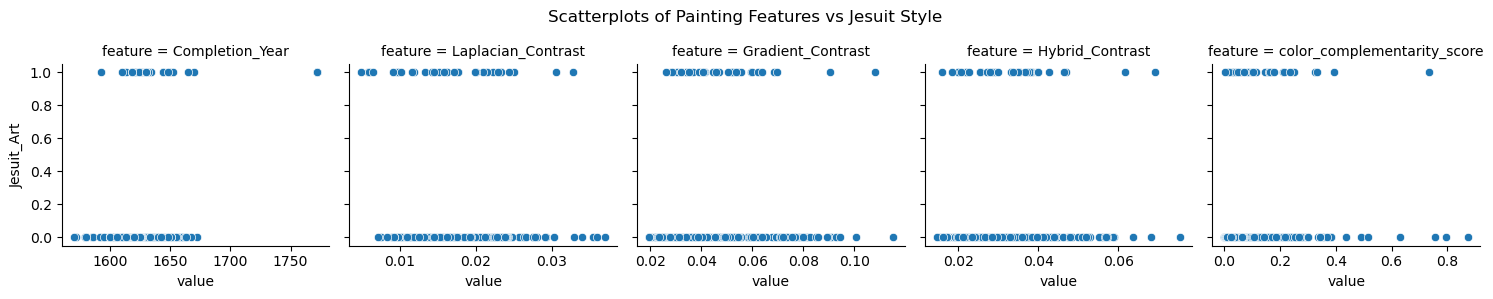

In [11]:
#Creating scatter plots using sns.relplot
sns.relplot(
    data=data_frame_plotting_long_jesuit,
    x='value',
    y='Jesuit_Art',
    col='feature',
    col_wrap=5,
    kind='scatter',
    height=3,
    facet_kws={'sharex': False, 'sharey': True}
)

plt.subplots_adjust(top=0.80)
plt.suptitle('Scatterplots of Painting Features vs Jesuit Style')
plt.show()

# Color Distribution - Sacred vs Non-Sacred

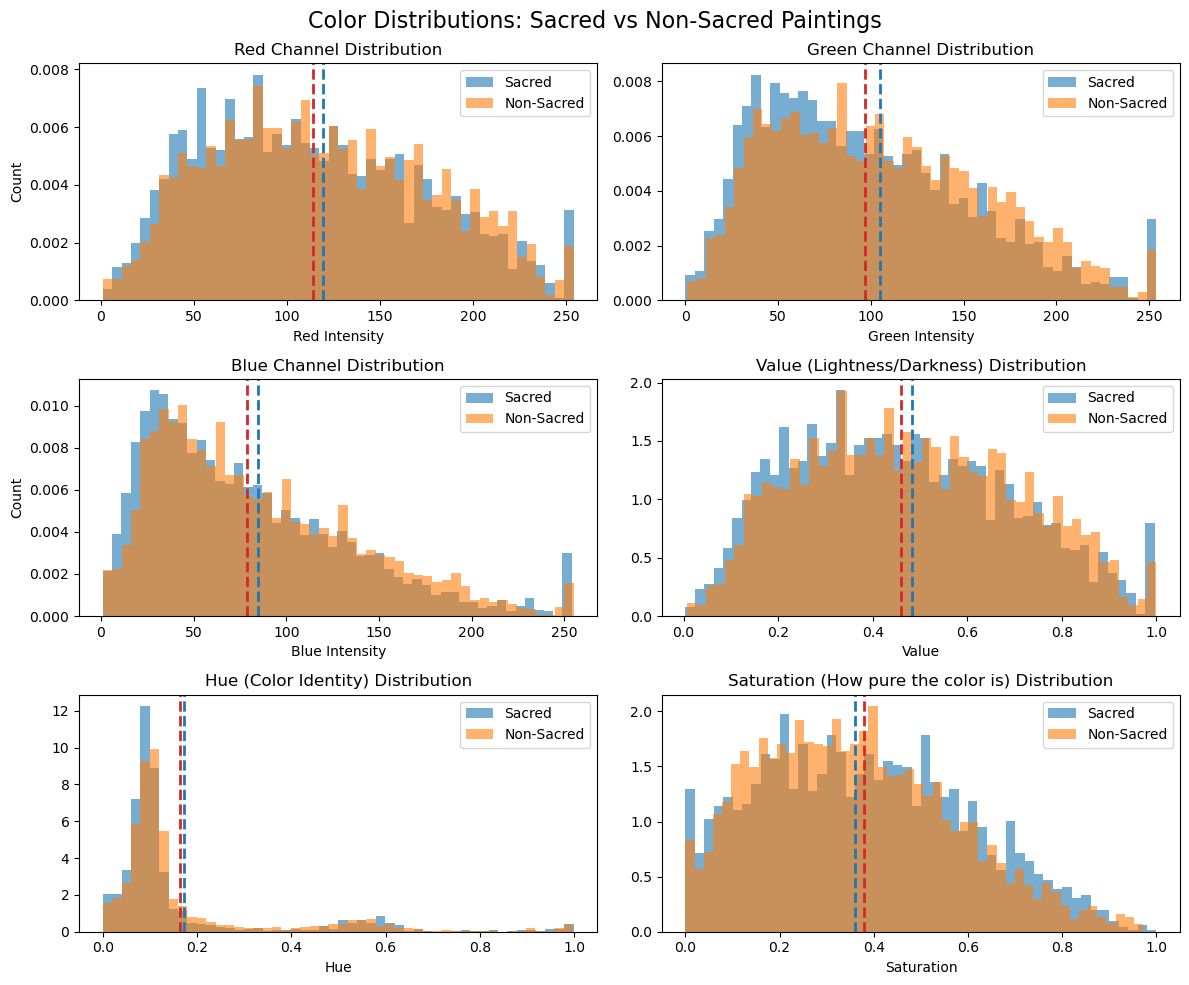

In [25]:
n_colors = 20
sacred_idx = np.where(adata_baroque_paintings.obs["sacred"].values == 1)[0]
non_sacred_idx = np.where(adata_baroque_paintings.obs["sacred"].values == 0)[0]

#Values for sacred and non-sacred paintings (rember that value is how light or dark the color is)
R_sacred, G_sacred, B_sacred, V_sacred, H_sacred, S_sacred = [], [], [], [], [], []
R_non, G_non, B_non, V_non, H_non, S_non    = [], [], [], [], [], []

def extract_colors(idx_list, R_list, G_list, B_list, V_list, H_list, S_list):

    for idx in idx_list:

        row_df = adata_baroque_paintings[idx, :].to_df()

        for i in range(1, n_colors + 1):

            R = row_df[f"color_{i}_R"].values[0]
            G = row_df[f"color_{i}_G"].values[0]
            B = row_df[f"color_{i}_B"].values[0]
            V = row_df[f"color_{i}_V"].values[0]
            H = row_df[f"color_{i}_H"].values[0]
            S = row_df[f"color_{i}_S"].values[0]
               
            R_list.append(R)
            G_list.append(G)
            B_list.append(B)
            V_list.append(V)
            H_list.append(H)
            S_list.append(S)

extract_colors(sacred_idx, R_sacred, G_sacred, B_sacred, V_sacred, H_sacred, S_sacred)
extract_colors(non_sacred_idx, R_non, G_non, B_non, V_non, H_non, S_non)

means = {
    "R": (np.mean(R_sacred), np.mean(R_non)),
    "G": (np.mean(G_sacred), np.mean(G_non)),
    "B": (np.mean(B_sacred), np.mean(B_non)),
    "V": (np.mean(V_sacred), np.mean(V_non)),
    "H": (np.mean(H_sacred), np.mean(H_non)),
    "S": (np.mean(S_sacred), np.mean(S_non)),
}



fig, axs = plt.subplots(3, 2, figsize=(12, 10))

mean_kwargs_sacred = dict(color="tab:red", linestyle="--", linewidth=2)
mean_kwargs_non    = dict(color="tab:blue", linestyle="--", linewidth=2)

axs[0,0].hist(R_sacred, bins=50, alpha=0.6, label="Sacred", density=True)
axs[0,0].hist(R_non, bins=50, alpha=0.6, label="Non-Sacred", density=True)
axs[0,0].axvline(means["R"][0], **mean_kwargs_sacred)
axs[0,0].axvline(means["R"][1], **mean_kwargs_non)
axs[0,0].set_title("Red Channel Distribution")
axs[0,0].set_xlabel("Red Intensity")
axs[0,0].set_ylabel("Count")
axs[0,0].legend()

axs[0,1].hist(G_sacred, bins=50, alpha=0.6, label="Sacred", density=True)
axs[0,1].hist(G_non, bins=50, alpha=0.6, label="Non-Sacred", density=True)
axs[0,1].axvline(means["G"][0], **mean_kwargs_sacred)
axs[0,1].axvline(means["G"][1], **mean_kwargs_non)
axs[0,1].set_title("Green Channel Distribution")
axs[0,1].set_xlabel("Green Intensity")
axs[0,1].legend()

axs[1,0].hist(B_sacred, bins=50, alpha=0.6, label="Sacred", density=True)
axs[1,0].hist(B_non, bins=50, alpha=0.6, label="Non-Sacred", density=True)
axs[1,0].axvline(means["B"][0], **mean_kwargs_sacred)
axs[1,0].axvline(means["B"][1], **mean_kwargs_non)
axs[1,0].set_title("Blue Channel Distribution")
axs[1,0].set_xlabel("Blue Intensity")
axs[1,0].set_ylabel("Count")
axs[1,0].legend()

axs[1,1].hist(V_sacred, bins=50, alpha=0.6, label="Sacred", density=True)
axs[1,1].hist(V_non, bins=50, alpha=0.6, label="Non-Sacred", density=True)
axs[1,1].axvline(means["V"][0], **mean_kwargs_sacred)
axs[1,1].axvline(means["V"][1], **mean_kwargs_non)
axs[1,1].set_title("Value (Lightness/Darkness) Distribution")
axs[1,1].set_xlabel("Value")
axs[1,1].legend()

axs[2,0].hist(H_sacred, bins=50, alpha=0.6, label="Sacred", density=True)
axs[2,0].hist(H_non, bins=50, alpha=0.6, label="Non-Sacred", density=True)
axs[2,0].axvline(means["H"][0], **mean_kwargs_sacred)
axs[2,0].axvline(means["H"][1], **mean_kwargs_non)
axs[2,0].set_title("Hue (Color Identity) Distribution")
axs[2,0].set_xlabel("Hue")
axs[2,0].legend()

axs[2,1].hist(S_sacred, bins=50, alpha=0.6, label="Sacred", density=True)
axs[2,1].hist(S_non, bins=50, alpha=0.6, label="Non-Sacred", density=True)
axs[2,1].axvline(means["S"][0], **mean_kwargs_sacred)
axs[2,1].axvline(means["S"][1], **mean_kwargs_non)
axs[2,1].set_title("Saturation (How pure the color is) Distribution")
axs[2,1].set_xlabel("Saturation")
axs[2,1].legend()

plt.suptitle("Color Distributions: Sacred vs Non-Sacred Paintings", fontsize=16)
plt.tight_layout()
plt.show()

# Color Distribution - Jesuit Art vs Non-Jesuit

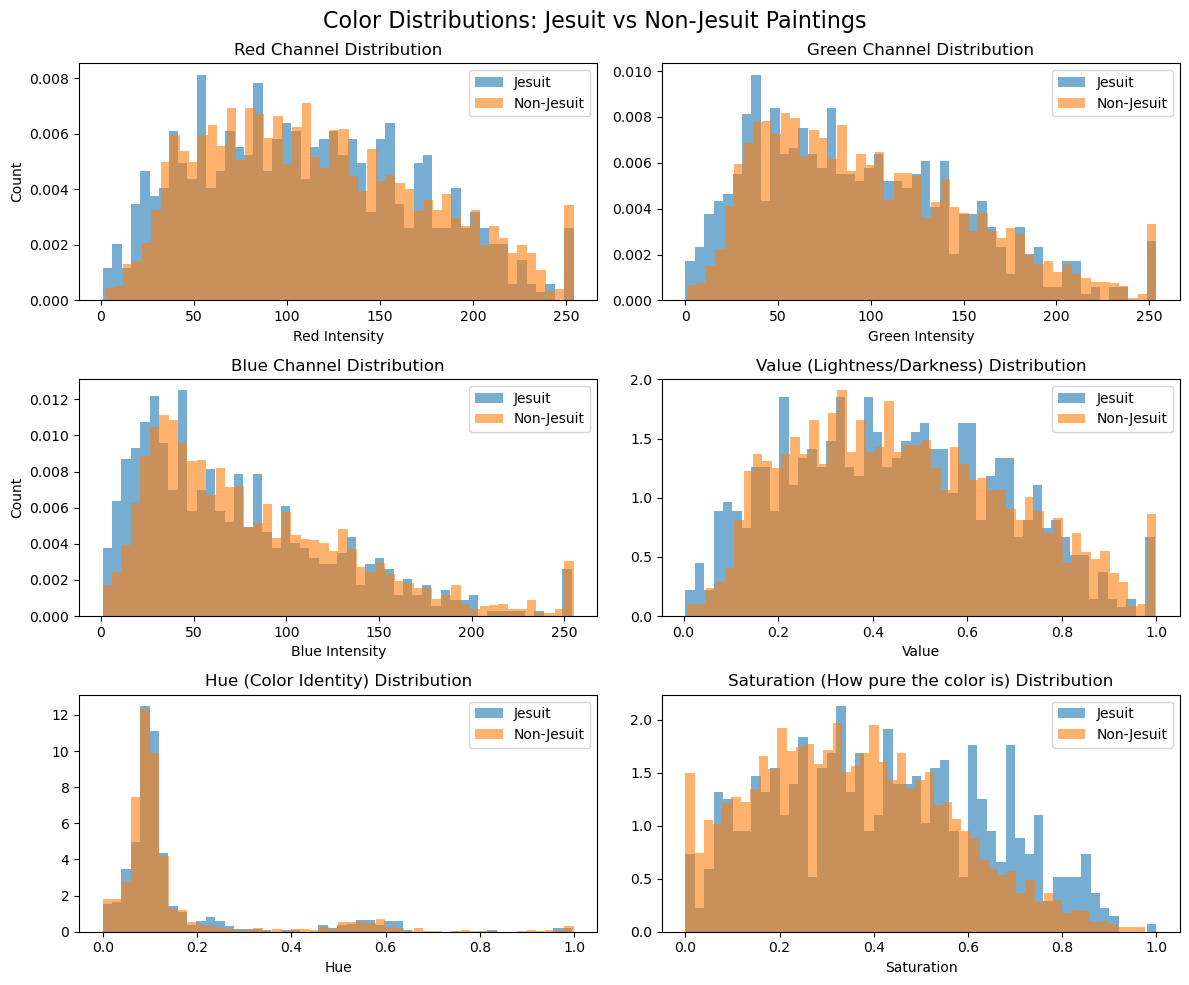

In [39]:
n_colors = 20
jesuit_idx = np.where(adata_baroque_paintings.obs["Jesuit_Art"].values == 1)[0]
non_jesuit_idx = np.where(adata_baroque_paintings.obs["Jesuit_Art"].values == 0)[0]

#Values for sacred and non-sacred paintings (rember that value is how light or dark the color is)
R_sacred, G_sacred, B_sacred, V_sacred, H_sacred, S_sacred = [], [], [], [], [], []
R_non, G_non, B_non, V_non, H_non, S_non    = [], [], [], [], [], []

def extract_colors(idx_list, R_list, G_list, B_list, V_list, H_list, S_list):

    for idx in idx_list:

        row_df = adata_baroque_paintings[idx, :].to_df()

        for i in range(1, n_colors + 1):

            R = row_df[f"color_{i}_R"].values[0]
            G = row_df[f"color_{i}_G"].values[0]
            B = row_df[f"color_{i}_B"].values[0]
            V = row_df[f"color_{i}_V"].values[0]
            H = row_df[f"color_{i}_H"].values[0]
            S = row_df[f"color_{i}_S"].values[0]
               
            R_list.append(R)
            G_list.append(G)
            B_list.append(B)
            V_list.append(V)
            H_list.append(H)
            S_list.append(S)

extract_colors(jesuit_idx, R_sacred, G_sacred, B_sacred, V_sacred, H_sacred, S_sacred)
extract_colors(non_jesuit_idx, R_non, G_non, B_non, V_non, H_non, S_non)

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0,0].hist(R_sacred, bins=50, alpha=0.6, label="Jesuit", density=True)
axs[0,0].hist(R_non, bins=50, alpha=0.6, label="Non-Jesuit", density=True)
axs[0,0].set_title("Red Channel Distribution")
axs[0,0].set_xlabel("Red Intensity")
axs[0,0].set_ylabel("Count")
axs[0,0].legend()

axs[0,1].hist(G_sacred, bins=50, alpha=0.6, label="Jesuit", density=True)
axs[0,1].hist(G_non, bins=50, alpha=0.6, label="Non-Jesuit", density=True)
axs[0,1].set_title("Green Channel Distribution")
axs[0,1].set_xlabel("Green Intensity")
axs[0,1].legend()

axs[1,0].hist(B_sacred, bins=50, alpha=0.6, label="Jesuit", density=True)
axs[1,0].hist(B_non, bins=50, alpha=0.6, label="Non-Jesuit", density=True)
axs[1,0].set_title("Blue Channel Distribution")
axs[1,0].set_xlabel("Blue Intensity")
axs[1,0].set_ylabel("Count")
axs[1,0].legend()

axs[1,1].hist(V_sacred, bins=50, alpha=0.6, label="Jesuit", density=True)
axs[1,1].hist(V_non, bins=50, alpha=0.6, label="Non-Jesuit", density=True)
axs[1,1].set_title("Value (Lightness/Darkness) Distribution")
axs[1,1].set_xlabel("Value")
axs[1,1].legend()

axs[2,0].hist(H_sacred, bins=50, alpha=0.6, label="Jesuit", density=True)
axs[2,0].hist(H_non, bins=50, alpha=0.6, label="Non-Jesuit", density=True)
axs[2,0].set_title("Hue (Color Identity) Distribution")
axs[2,0].set_xlabel("Hue")
axs[2,0].legend()

axs[2,1].hist(S_sacred, bins=50, alpha=0.6, label="Jesuit", density=True)
axs[2,1].hist(S_non, bins=50, alpha=0.6, label="Non-Jesuit", density=True)
axs[2,1].set_title("Saturation (How pure the color is) Distribution")
axs[2,1].set_xlabel("Saturation")
axs[2,1].legend()

plt.suptitle("Color Distributions: Jesuit vs Non-Jesuit Paintings", fontsize=16)
plt.tight_layout()
plt.show()

# Color Distribution - Painters

In [45]:
n_colors = 20

# Painters info
painters = adata_baroque_paintings.obs["Painter"].unique()

# Dictionary to store extracted values per painter
color_data = {
    painter: {
        "R": [], "G": [], "B": [],
        "V": [], "H": [], "S": []
    }
    for painter in painters
}

for painter in painters:

    idx_list = np.where(adata_baroque_paintings.obs["Painter"] == painter)[0]

    for idx in idx_list:
        row_df = adata_baroque_paintings[idx, :].to_df()

        for i in range(1, n_colors + 1):
            color_data[painter]["R"].append(row_df[f"color_{i}_R"].values[0])
            color_data[painter]["G"].append(row_df[f"color_{i}_G"].values[0])
            color_data[painter]["B"].append(row_df[f"color_{i}_B"].values[0])
            color_data[painter]["V"].append(row_df[f"color_{i}_V"].values[0])
            color_data[painter]["H"].append(row_df[f"color_{i}_H"].values[0])
            color_data[painter]["S"].append(row_df[f"color_{i}_S"].values[0])

In [46]:
color_data

{'Michelangelo Merisi Caravaggio': {'R': [np.float64(29.0),
   np.float64(35.0),
   np.float64(42.0),
   np.float64(50.0),
   np.float64(59.0),
   np.float64(71.0),
   np.float64(83.0),
   np.float64(98.0),
   np.float64(112.0),
   np.float64(181.0),
   np.float64(162.0),
   np.float64(176.0),
   np.float64(145.0),
   np.float64(158.0),
   np.float64(129.0),
   np.float64(194.0),
   np.float64(141.0),
   np.float64(122.0),
   np.float64(171.0),
   np.float64(193.0),
   np.float64(20.0),
   np.float64(23.0),
   np.float64(30.0),
   np.float64(42.0),
   np.float64(54.0),
   np.float64(63.0),
   np.float64(80.0),
   np.float64(96.0),
   np.float64(92.0),
   np.float64(192.0),
   np.float64(114.0),
   np.float64(72.0),
   np.float64(177.0),
   np.float64(160.0),
   np.float64(136.0),
   np.float64(177.0),
   np.float64(157.0),
   np.float64(135.0),
   np.float64(112.0),
   np.float64(82.0)],
  'G': [np.float64(24.0),
   np.float64(28.0),
   np.float64(33.0),
   np.float64(38.0),
   np.floa

In [49]:
rows_painters = []

for painter in painters:
    rows_painters.append(
        {
        "Painter": painter,
        "Mean_R": np.mean(color_data[painter]["R"]),
        "Mean_G": np.mean(color_data[painter]["G"]),
        "Mean_B": np.mean(color_data[painter]["B"]),
        "Mean_V": np.mean(color_data[painter]["V"]),
        "Mean_H": np.mean(color_data[painter]["H"]),
        "Mean_S": np.mean(color_data[painter]["S"]),
        "Var_R": np.var(color_data[painter]["R"]),
        "Var_G": np.var(color_data[painter]["G"]),
        "Var_B": np.var(color_data[painter]["B"]),
        "Var_V": np.var(color_data[painter]["V"]),
        "Var_H": np.var(color_data[painter]["H"]),
        "Var_S": np.var(color_data[painter]["S"]),
    }
    )

df_painters = pd.DataFrame(rows_painters)

In [50]:
df_painters

Painter      Mean_R      Mean_G      Mean_B  \
0         Michelangelo Merisi Caravaggio  109.125000   88.675000   59.875000   
1                      Peter Paul Rubens  113.641429   95.080000   76.602857   
2                          Frans Snyders  116.550000   98.850000   71.250000   
3            Giovanni Francesco Barbieri   99.850000   86.800000   65.000000   
4                       Scipione Pulzone   71.800000   62.050000   54.600000   
5                             Guido Reni  115.585714   95.257143   76.402381   
6                       Jusepe de Ribera   61.400000   44.500000   32.050000   
7              Giovanni Domenico Tiepolo  130.043750  114.456250   93.368750   
8   Diego Rodríguez de Silva y Velázquez  116.682292  101.384375   80.792708   
9                               El Greco  117.665000  106.115000   90.196250   
10                           Alonso Cano  112.000000  100.400000   83.750000   
11             Bartolomé Esteban Murillo  125.300000  118.200000  101.750000   
12                     Anthonis van Dyck  103.333333   80.194444   56.083333   
13                        Gerard Seghers  107.300000  112.800000   97.100000   
14                        Daniel Seghers  126.550000   97.000000   68.650000   
15                      Sebastian Vrancx  106.900000   72.600000   34.300000   
16                Anton Günther Gheringh   95.950000   75.800000   57.600000   
17                         Luca Giordano  120.350000  100.350000   76.950000   
18                      Johannes Vermeer   80.700000   67.800000   55.090000   
19        Rembrandt Harmenszoon van Rijn  112.150000   99.500000   74.000000   
20                Philippe de Champaigne  117.267308  100.553846   88.025000   

      Mean_V    Mean_H    Mean_S        Var_R        Var_G        Var_B  \
0   0.428137  0.098982  0.467018  2938.959375  2515.919375  1593.009375   
1   0.453373  0.130636  0.372932  3406.247141  3090.473600  2950.982278   
2   0.457059  0.105686  0.468089  3742.147500  4108.427500  4646.287500   
3   0.429020  0.209339  0.517262  3899.327500  2893.460000  2260.400000   
4   0.312157  0.353629  0.467206  2169.660000  1877.347500  1353.240000   
5   0.463940  0.126706  0.403852  3485.218844  3155.333878  3044.840471   
6   0.240784  0.085060  0.374126  1232.940000   462.550000   140.347500   
7   0.528260  0.153754  0.386138  3255.704336  3464.548086  3805.720273   
8   0.463035  0.130168  0.353399  3057.279270  2896.876214  2877.778905   
9   0.474005  0.160220  0.302098  3383.737775  3080.686775  2894.767736   
10  0.439216  0.096939  0.269486  2671.600000  2652.940000  1928.787500   
11  0.520000  0.171019  0.310959  4105.010000  3554.960000  3392.987500   
12  0.408148  0.102020  0.491713  3286.500000  2632.256636  2048.476389   
13  0.442353  0.231819  0.166649  3358.410000  3133.360000  2921.890000   
14  0.499216  0.192117  0.457921  4692.347500  3954.350000  2885.727500   
15  0.419804  0.093559  0.729383  2708.290000  2391.940000  1074.910000   
16  0.376667  0.110875  0.382516  1784.547500  1457.860000   914.140000   
17  0.504706  0.159585  0.470597  2948.627500  2036.327500  2068.647500   
18  0.323216  0.152649  0.360313  2722.970000  1939.620000  1397.421900   
19  0.439804  0.105207  0.338466  3258.527500  2897.550000  1819.000000   
20  0.484163  0.237009  0.350508  3831.261239  3296.877870  3215.582067   

       Var_V     Var_H     Var_S  
0   0.045063  0.001021  0.027627  
1   0.051295  0.018204  0.045907  
2   0.057549  0.001479  0.052017  
3   0.053328  0.039994  0.034170  
4   0.028065  0.096464  0.070111  
5   0.051220  0.021322  0.056042  
6   0.018961  0.001149  0.042918  
7   0.048236  0.022130  0.044697  
8   0.046923  0.014762  0.034334  
9   0.050167  0.029391  0.032663  
10  0.041086  0.000585  0.007453  
11  0.053008  0.031972  0.027842  
12  0.049753  0.006328  0.040983  
13  0.048187  0.001552  0.003129  
14  0.071593  0.061641  0.057634  
15  0.041205  0.001399  0.019026  
16  0.027201  0.004187  0.

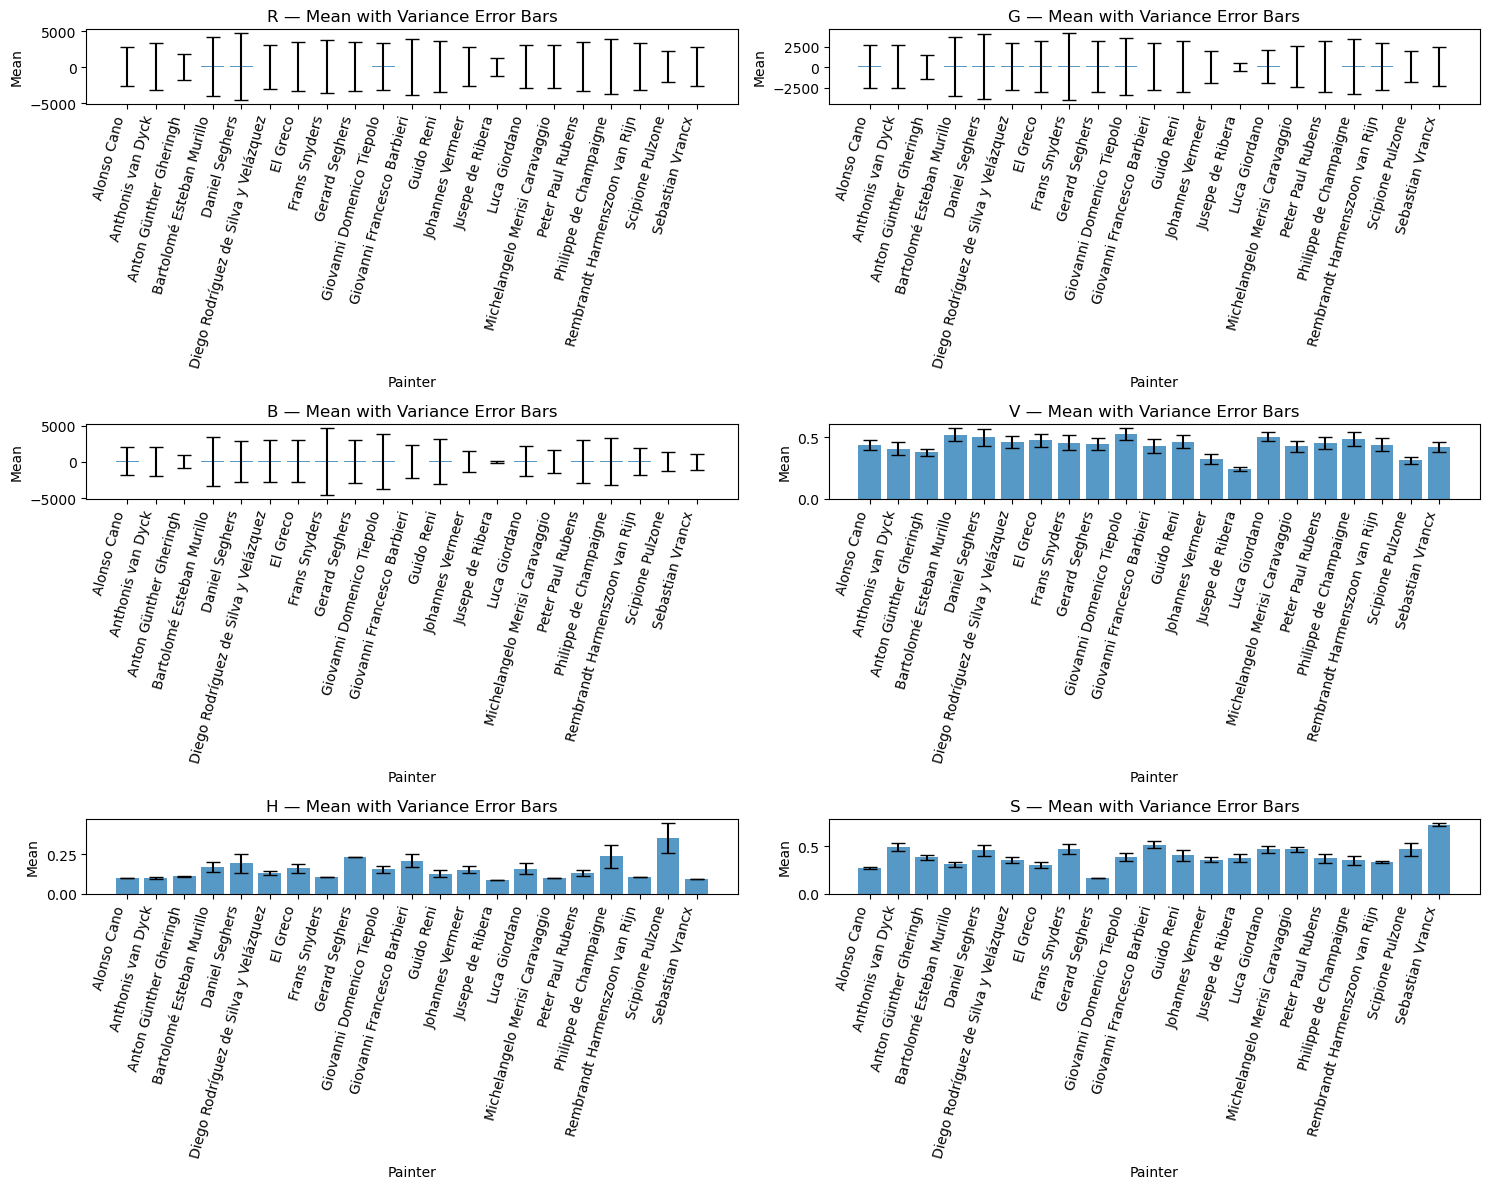

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Sort painters alphabetically for nicer plotting (optional)
df_painters_sorted = df_painters.sort_values("Painter")

painters_list = df_painters_sorted["Painter"]
x = np.arange(len(painters_list))  # x positions

channels = ["R", "G", "B", "V", "H", "S"]

fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs = axs.ravel()

for i, channel in enumerate(channels):

    means = df_painters_sorted[f"Mean_{channel}"]
    variances = df_painters_sorted[f"Var_{channel}"]

    axs[i].bar(
        x,
        means,
        yerr=variances,
        capsize=5,
        alpha=0.75,
        color="tab:blue",
    )

    axs[i].set_title(f"{channel} — Mean with Variance Error Bars")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(painters_list, rotation=75, ha="right")
    axs[i].set_ylabel("Mean")
    axs[i].set_xlabel("Painter")

plt.tight_layout()
plt.show()

# Color Distribution - Time

In [19]:
import numpy as np
import pandas as pd

n_colors = 20

time_bins = {
    "pre_1625": lambda y: y < 1625,
    "y1625_1675": lambda y: 1625 <= y <= 1675,
    "post_1675": lambda y: y > 1675
}

rows_time = []

# Loop over painters
for painter in adata_baroque_paintings.obs["Painter"].unique():

    painter_mask = adata_baroque_paintings.obs["Painter"] == painter
    adata_painter = adata_baroque_paintings[painter_mask]

    # Loop over time periods
    for period, rule in time_bins.items():

        color_data = {k: [] for k in ["R", "G", "B", "V", "H", "S"]}

        for idx in range(adata_painter.n_obs):
            year = adata_painter.obs.iloc[idx]["Completion_Year"]

            if not rule(year):
                continue

            row_df = adata_painter[idx, :].to_df()

            for i in range(1, n_colors + 1):
                for ch in color_data.keys():
                    color_data[ch].append(
                        row_df[f"color_{i}_{ch}"].values[0]
                    )

        # Skip empty painter–period combinations
        if len(color_data["R"]) == 0:
            continue

        rows_time.append(
            {
                "Painter": painter,
                "Period": period,
                **{f"Mean_{k}": np.mean(v) for k, v in color_data.items()},
                **{f"Var_{k}": np.var(v) for k, v in color_data.items()},
            }
        )

df_time = pd.DataFrame(rows_time)

In [20]:
df_time

Painter      Period      Mean_R      Mean_G  \
0         Michelangelo Merisi Caravaggio    pre_1625  109.125000   88.675000   
1                      Peter Paul Rubens    pre_1625  114.048438   95.756250   
2                      Peter Paul Rubens  y1625_1675  109.300000   87.866667   
3                          Frans Snyders    pre_1625  116.550000   98.850000   
4            Giovanni Francesco Barbieri  y1625_1675   99.850000   86.800000   
5                       Scipione Pulzone    pre_1625   71.800000   62.050000   
6                             Guido Reni    pre_1625  105.283333   87.308333   
7                             Guido Reni  y1625_1675  119.706667   98.436667   
8                       Jusepe de Ribera    pre_1625   61.400000   44.500000   
9              Giovanni Domenico Tiepolo   post_1675  130.043750  114.456250   
10  Diego Rodríguez de Silva y Velázquez    pre_1625  111.620000   90.720000   
11  Diego Rodríguez de Silva y Velázquez  y1625_1675  117.270930  102.624419   
12                              El Greco    pre_1625  117.343421  105.746053   
13                              El Greco  y1625_1675  123.775000  113.125000   
14                           Alonso Cano  y1625_1675  112.000000  100.400000   
15             Bartolomé Esteban Murillo  y1625_1675  125.300000  118.200000   
16                     Anthonis van Dyck    pre_1625  110.125000   79.625000   
17                     Anthonis van Dyck  y1625_1675   97.900000   80.650000   
18                        Gerard Seghers  y1625_1675  107.300000  112.800000   
19                        Daniel Seghers  y1625_1675  126.550000   97.000000   
20                      Sebastian Vrancx  y1625_1675  106.900000   72.600000   
21                Anton Günther Gheringh  y1625_1675   95.950000   75.800000   
22                         Luca Giordano  y1625_1675  120.350000  100.350000   
23                      Johannes Vermeer  y1625_1675   80.700000   67.800000   
24        Rembrandt Harmenszoon van Rijn  y1625_1675  112.150000   99.500000   
25                Philippe de Champaigne  y1625_1675  117.267308  100.553846   
26              Franz Xaver Winterhalter   post_1675  119.386000  102.542000   
27                   Jacques-Louis David   post_1675  112.661538   93.280769   
28                 Jean-Honoré Fragonard   post_1675  126.680952  107.552381   
29                      Vincent van Gogh   post_1675  128.002500  128.690000   

        Mean_B    Mean_V    Mean_H    Mean_S        Var_R        Var_G  \
0    59.875000  0.428137  0.098982  0.467018  2938.959375  2515.919375   
1    77.900000  0.455576  0.132034  0.365079  3511.102341  3216.156211   
2    62.766667  0.429869  0.115726  0.456695  2267.176667  1692.948889   
3    71.250000  0.457059  0.105686  0.468089  3742.147500  4108.427500   
4    65.000000  0.429020  0.209339  0.517262  3899.327500  2893.460000   
5    54.600000  0.312157  0.353629  0.467206  2169.660000  1877.347500   
6    69.525000  0.415098  0.116821  0.360412  2997.269722  2805.013264   
7    79.153333  0.483477  0.130661  0.421228  3620.960622  3260.079322   
8    32.050000  0.240784  0.085060  0.374126  1232.940000   462.550000   
9    93.368750  0.528260  0.153754  0.386138  3255.704336  3464.548086   
10   64.960000  0.438549  0.104500  0.427791  3164.935600  2396.081600   
11   82.633721  0.465882  0.133152  0.344748  3041.434736  2940.346148   
12   89.856579  0.473406  0.163336  0.302942  3359.804430  3040.555248   
13   96.650000  0.485392  0.101016  0.286067  3799.174375  3791.459375   
14   83.750000  0.439216  0.096939  0.269486  2671.600000  2652.940000   
15  101.750000  0.520000  0.171019  0.310959  4105.010000  3554.960000   
16   55.612500  0.431863  0.070769  0.532091  3406.784375  2849.209375   
17   56.460000  0.389176  0.127021  0.459410  3123.850000  2458.227500   
18   97.100000  0.442353  0.231819  0.166649  3358.410000  3133.360000   
19   68.650000  0.499216  0.192117  0.457921  4692.347500  3954.350000  

In [23]:
df_time_period = (
    df_time
    .groupby("Period")
    .agg(
        **{f"Mean_{c}": (f"Mean_{c}", "mean") for c in ["R", "G", "B", "V", "H", "S"]},
        **{f"Var_{c}": (f"Var_{c}", "mean") for c in ["R", "G", "B", "V", "H", "S"]},
    )
    .reset_index()
)

desired_order = ["pre_1625", "y1625_1675", "post_1675"]

df_time_period = (
    df_time_period
    .set_index("Period")
    .loc[desired_order]
    .reset_index()
)

In [24]:
df_time_period

Period      Mean_R      Mean_G     Mean_B    Mean_V    Mean_H  \
0    pre_1625  101.921688   83.692293  63.958787  0.405848  0.136758   
1  y1625_1675  110.766869   94.656662  73.742420  0.445748  0.147981   
2   post_1675  123.354948  109.304280  87.529747  0.506842  0.204146   

     Mean_S        Var_R        Var_G        Var_B     Var_V     Var_H  \
0  0.418306  2947.067038  2585.695564  2259.535392  0.044340  0.017990   
1  0.395138  3239.594696  2772.019163  2378.366323  0.047447  0.020703   
2  0.380706  3357.164990  3123.062863  2909.908283  0.047860  0.044872   

      Var_S  
0  0.043616  
1  0.033603  
2  0.046973

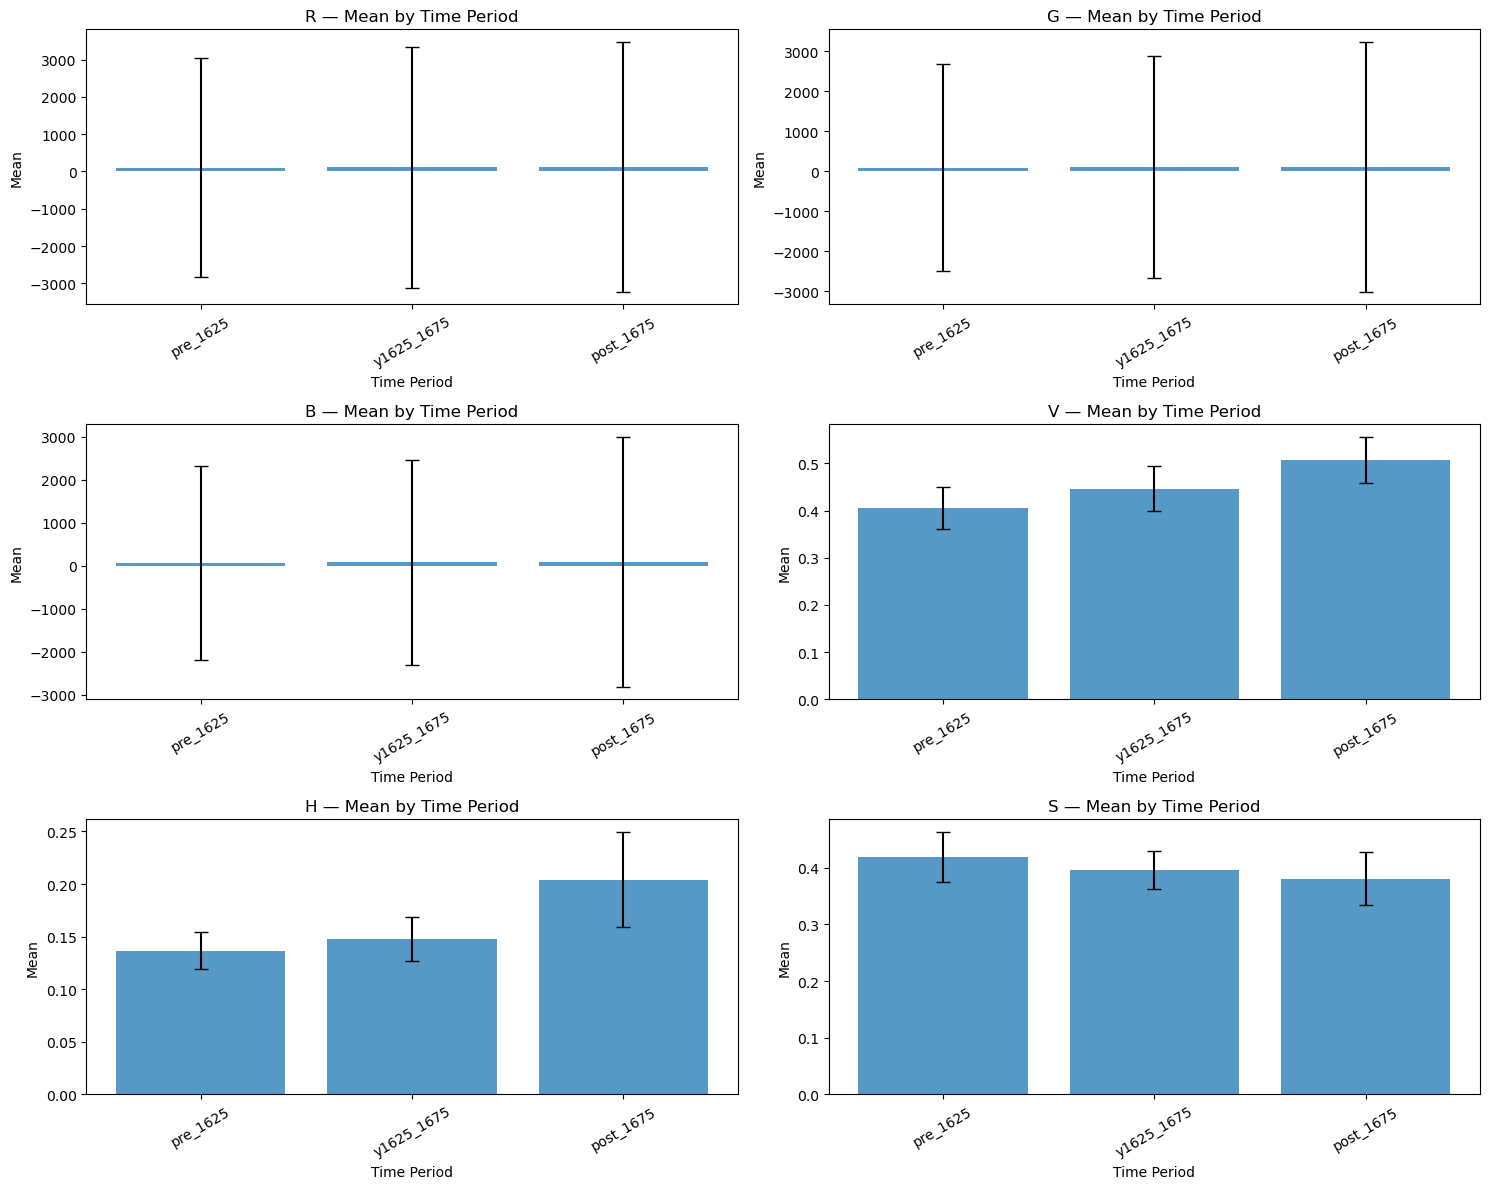

In [25]:
periods = df_time_period["Period"]
x = np.arange(len(periods))

channels = ["R", "G", "B", "V", "H", "S"]

fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs = axs.ravel()

for i, channel in enumerate(channels):

    means = df_time_period[f"Mean_{channel}"]
    variances = df_time_period[f"Var_{channel}"]

    axs[i].bar(
        x,
        means,
        yerr=variances,
        capsize=5,
        alpha=0.75,
    )

    axs[i].set_title(f"{channel} — Mean by Time Period")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(periods, rotation=30)
    axs[i].set_ylabel("Mean")
    axs[i].set_xlabel("Time Period")

plt.tight_layout()
plt.show()